In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from numpy import exp,sin,cos,pi
from IPython.display import clear_output 

In [ ]:
!pip install clifford
clear_output()

In [ ]:
import clifford 
from clifford.g3c import *

In [ ]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

Square = np.array([
     e1 + e2,
     e1 - e2,
    -e1 - e2,
    -e1 + e2
])

M = 9

String = np.arange(1,M+1)*e1

#2D Projection 

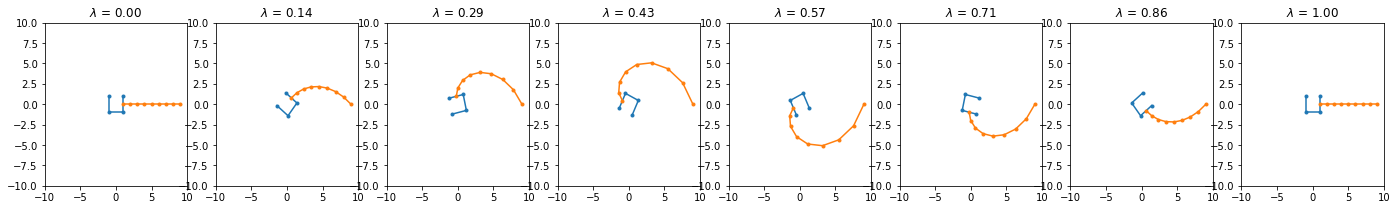

In [ ]:
N = 8

plt.rcParams['figure.figsize'] = [24, 24//N]
fig, axs = plt.subplots(1,N,)

for i in range(N): #index along the rotation angle
    lam = i / (N-1)

    RotSquare = R12(lam) * Square * ~R12(lam)


    RotString = np.zeros_like(String)
    for j in range(M): #index along the string
        alpha = j / (M-1)

        lam12 = (lam if lam < 0.5 else lam-1) * (1-alpha)

        RotString[j] = R12(lam12) * String[j] * ~R12(lam12) 


    axs[i].set_title(f"$\\lambda$ = {lam:.2f}")

    e1_e2 = np.array([[e1],[e2]]) 
    axs[i].plot(*RotSquare|e1_e2, marker=".")
    axs[i].plot(*RotString|e1_e2, marker=".")

    axs[i].set_xlim(-10,10)
    axs[i].set_ylim(-10,10)

    #axs[i].set_aspect('equal')



#Flipping with $\exp( e_{23}\pi)$

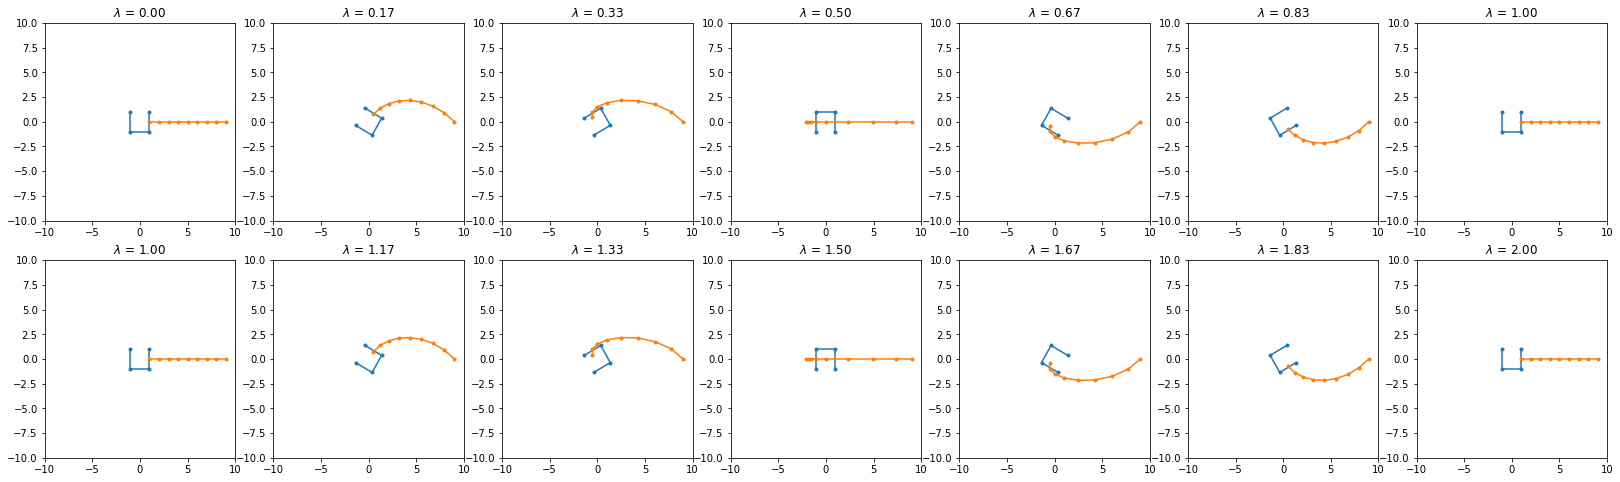

In [ ]:
N = 7

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,)#subplot_kw=dict(projection='3d'))


for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j

        RotSquare = R12(lam) * Square * ~R12(lam)


        RotString = np.zeros_like(String)
        for k in range(M): #index along the string
            alpha = k / (M-1)

            lam12 = (lam if 0 <= lam and lam < 0.5 else 
                     1 - lam  if 0.5 <= lam <= 1 else
                    lam-1 if 1 < lam <= 1.5 else
                     2-lam
                     ) * (1-alpha)

            lam23 = (0.5*lam if 0<=lam and lam < 1 else -0.5*lam+0.5)


            RotString[k] = R23(lam23) * R12(lam12) * String[k] * ~R12(lam12) * ~R23(lam23) 



        axs[j,i].set_title(f"$\\lambda$ = {lam:.2f}")

        e1_e2 = np.array([[e1],[e2]]) 
        axs[j,i].plot(*RotSquare|e1_e2, marker=".",)#zs = RotSquare|e3)
        axs[j,i].plot(*RotString|e1_e2, marker=".",)#zs = RotString|e3)

        axs[j,i].set_xlim(-10,10)
        axs[j,i].set_ylim(-10,10)
        #axs[j,i].set_zlim(-10,10)

        #axs[i].set_aspect('equal')



#Going into 3D

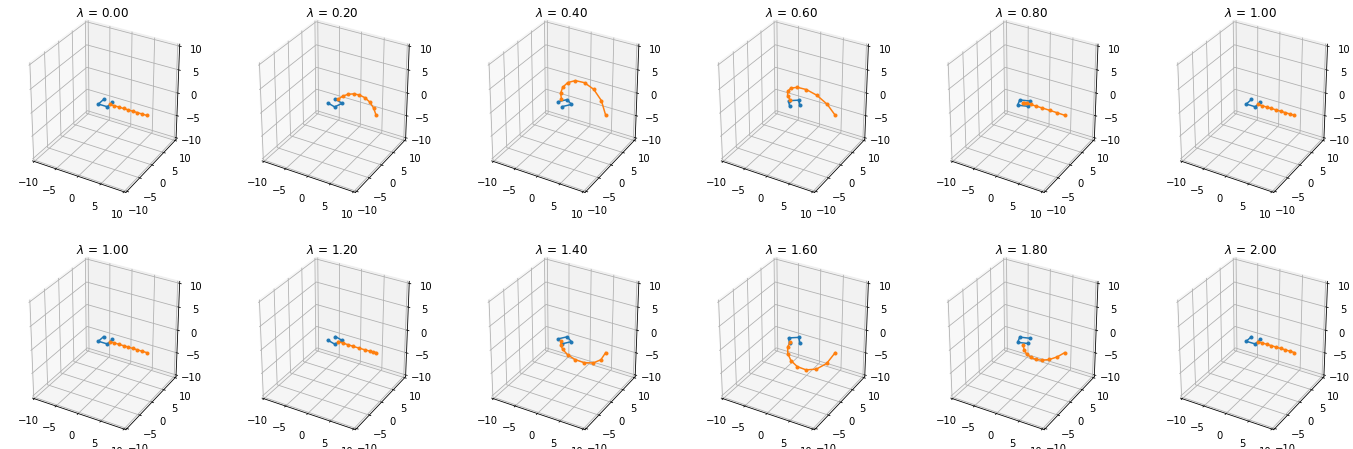

In [ ]:
N = 6

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))


for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j

        RotSquare = R12(lam) * Square * ~R12(lam)


        RotString = np.zeros_like(String)
        for k in range(M): #index along the string
            alpha = k / (M-1)

            lam12 = (lam if 0 <= lam and lam < 0.5 else 
                     1 - lam  if 0.5 <= lam <= 1 else
                    lam-1 if 1 < lam <= 1.5 else
                     2-lam
                     ) * (1-alpha)

            lam23 = (0.5*lam if 0<=lam and lam < 1 else -0.5*lam+0.5)


            RotString[k] = R23(lam23) * R12(lam12) * String[k] * ~R12(lam12) * ~R23(lam23) 



        axs[j,i].set_title(f"$\\lambda$ = {lam:.2f}")

        e1_e2 = np.array([[e1],[e2]]) 
        axs[j,i].plot(*RotSquare|e1_e2, marker=".",zs = RotSquare|e3)
        axs[j,i].plot(*RotString|e1_e2, marker=".",zs = RotString|e3)

        axs[j,i].set_xlim(-10,10)
        axs[j,i].set_ylim(-10,10)
        axs[j,i].set_zlim(-10,10)

        #axs[i].set_aspect('equal')


#Multiple Strings

In [ ]:
Cube = np.array([
     e1 + e2 + e3,
     e1 - e2 + e3,
    -e1 - e2 + e3,
    -e1 + e2 + e3,
     e1 + e2 - e3,
     e1 - e2 - e3,
    -e1 - e2 - e3,
    -e1 + e2 - e3,
])

M = 9
String = np.arange(1,M+1)*e1

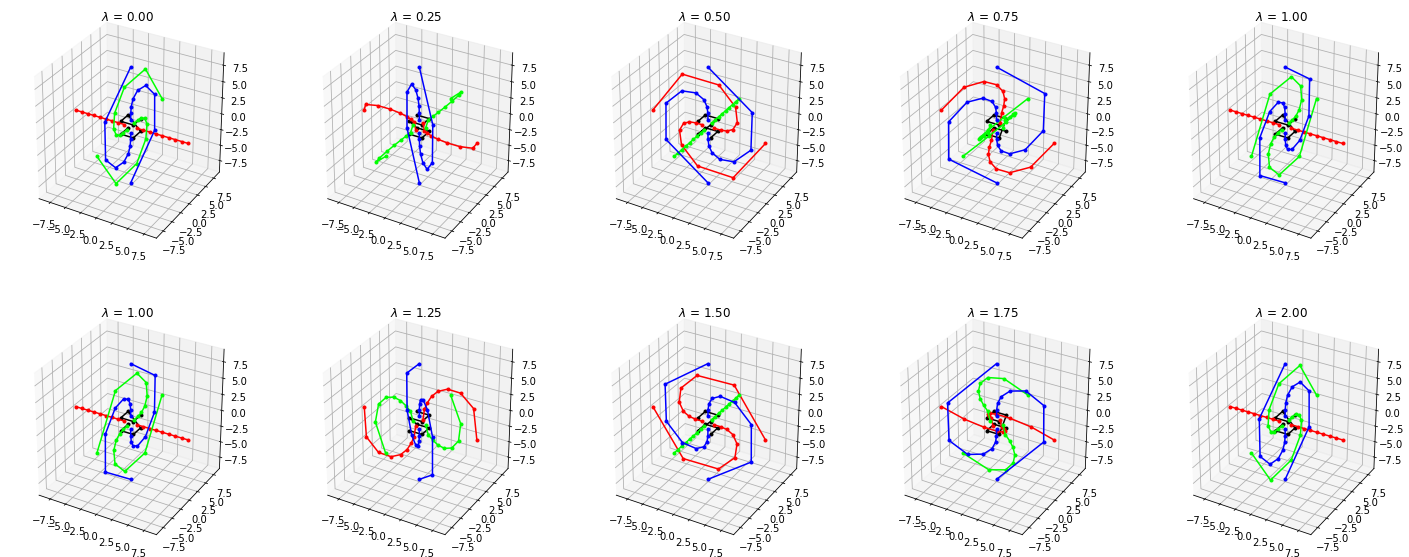

In [ ]:
N = 5

plt.rcParams['figure.figsize'] = [5*N, 5*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))

def StringTransform(lam, String):
    lam %= 2
    M = len(String)

    RotString = np.zeros_like(String)
    for k in range(M): #index along the string
            alpha = k / (M-1)

            lam12 = (lam if 0 <= lam and lam < 0.5 else 
                     1 - lam  if 0.5 <= lam <= 1 else
                    lam-1 if 1 < lam <= 1.5 else
                     2-lam
                     ) * max(0,1-alpha**3)

            lam23 = (0.5*lam if 0<=lam and lam < 1 else -0.5*lam+0.5) 

            if k:
                RotString[k] = R23(lam23) * R12(lam12) * String[k] * ~R12(lam12) * ~R23(lam23) 
            else:
                RotString[0] = R12(lam) * String[k] * ~R12(lam)

    return RotString

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j

        RotCube = R12(lam) * Cube * ~R12(lam)


        RotStringX1 = StringTransform(lam+1,String)
        RotStringX2 = R12(0.5)*StringTransform(lam+0,String)*~R12(0.5)

        RotStringY1 = R12(0.25)*StringTransform(lam+0.5,String)*~R12(0.25)
        RotStringY2 = R12(0.75)*StringTransform(lam+1.5,String)*~R12(0.75)

        RotStringZ1 = R12(0.25+0.5*lam)*R31(0.25)*StringTransform(0.5,String)*~R31(0.25)*~R12(0.25+0.5*lam)
        RotStringZ2 = R12(0.25+0.5*lam)*R31(0.25)*R12(0.5)*StringTransform(1.5,String)*~R12(0.5)*~R31(0.25)*~R12(0.25+0.5*lam)


        axs[j,i].set_title(f"$\\lambda$ = {lam:.2f}")

        e1_e2 = np.array([[e1],[e2]]) 
        axs[j,i].plot(*RotCube|e1_e2, marker=".",zs = RotCube|e3, color = "black")

        axs[j,i].plot(*RotStringX1|e1_e2, marker=".",zs = RotStringX1|e3,color="red")
        axs[j,i].plot(*RotStringX2|e1_e2, marker=".",zs = RotStringX2|e3,color="red")

        axs[j,i].plot(*RotStringY1|e1_e2, marker=".",zs = RotStringY1|e3,color="lime")
        axs[j,i].plot(*RotStringY2|e1_e2, marker=".",zs = RotStringY2|e3,color="lime")

        axs[j,i].plot(*RotStringZ1|e1_e2, marker=".",zs = RotStringZ1|e3,color="blue")
        axs[j,i].plot(*RotStringZ2|e1_e2, marker=".",zs = RotStringZ2|e3,color="blue")

        axs[j,i].set_xlim(-M,M)
        axs[j,i].set_ylim(-M,M)
        axs[j,i].set_zlim(-M,M)

        #axs[i].set_aspect('equal')


#General Form 

In [ ]:
Cube = np.array([
     e1 + e2 + e3,
     e1 - e2 + e3,
    -e1 - e2 + e3,
    -e1 + e2 + e3,
     e1 + e2 - e3,
     e1 - e2 - e3,
    -e1 - e2 - e3,
    -e1 + e2 - e3,
])

M = 9
String = np.arange(1,M+1)*e1
N = 5

def draw3d(i,j,RotCube,*RotStrings): 
    """

    i,j : Indices in plot
    RotCube : Rotated cube
    RotStrings : Rot. strings in order +X,-X,+Y,-Y,+Z,-Z

    """

    axs[j,i].set_title(f"$\\lambda$ = {lam:.2f}")

    e1_e2 = np.array([[e1],[e2]]) 
    axs[j,i].plot(*RotCube|e1_e2, marker=".",zs = RotCube|e3, color = "black")

    colors = ["red","red","lime","lime","blue","blue"]
    for k in range(len(RotStrings)):
        axs[j,i].plot(*RotStrings[k]|e1_e2, marker=".",zs = RotStrings[k]|e3,color=colors[k])

    axs[j,i].set_xlim(-M,M)
    axs[j,i].set_ylim(-M,M)
    axs[j,i].set_zlim(-M,M) 


def Sz(lam, String):
    lam %= 2

    R12 = lambda lam : exp(-e12*pi*lam)
    R23 = lambda lam : exp(-e23*pi*lam)
    #R31 = lambda lam : exp(e13*pi*lam)

    M = len(String)

    RotString = np.zeros_like(String)
    for k in range(M): #index along the string
            alpha = k / (M-1)

            lam12 = (lam      if 0 <= lam and lam < 0.5 else 
                     1 - lam  if 0.5 <= lam <= 1 else
                    lam-1     if 1 < lam <= 1.5 else
                     2-lam
                     ) * max(0,1-alpha**3)

            lam23 = 0.5*(lam  if 0<=lam and lam < 1 else
                         1-lam) 

            if k:
                RotString[k] = R23(lam23) * R12(lam12) * String[k] * ~R12(lam12) * ~R23(lam23) 
            else:
                RotString[0] = R12(lam) * String[k] * ~R12(lam)

    return RotString



In [ ]:
for ei in (e1,e2,e3):
    for ej in (e1,e2,e3):
        print((ei^ej)/(e123),end=" ")
    print()

0 (1.0^e3) -(1.0^e2) 
-(1.0^e3) 0 (1.0^e1) 
(1.0^e2) -(1.0^e1) 0 


In [ ]:
def S(lam, rotation_axis, string_axis, String):
    '''
    lam : rotation number 0..2
    string_axis : axis on which string is attached e1,e2,e3
    rotation_axis : rotation axis e1,e2,e3
    String : String object
    '''

    ei = string_axis 
    ek = rotation_axis 
    ej = -(ei ^ ek) / e123
    

    lam %= 2

    Rij = lambda lam : exp(-ei^ej*pi*lam)
    Rjk = lambda lam : exp(-ej^ek*pi*lam)


    M = len(String)
    RotString = np.zeros_like(String)
    for a in range(M): #index along the string
            alpha = a / (M-1)

            lambda_ij = (lam      if 0 <= lam and lam < 0.5 else 
                         1 - lam  if 0.5 <= lam <= 1 else
                         lam-1     if 1 < lam <= 1.5 else
                         2-lam) * max(0,1-alpha**3)

            lambda_jk = 0.5*(lam  if 0<=lam and lam < 1 else
                             1-lam) 

            if a:
                RotString[a] = Rjk(lambda_jk) * Rij(lambda_ij) * String[a] * ~Rij(lambda_ij) * ~Rjk(lambda_jk) 
            else:
                RotString[0] = Rij(lam) * String[a] * ~Rij(lam)

    return RotString

In [ ]:
from google.colab import files

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

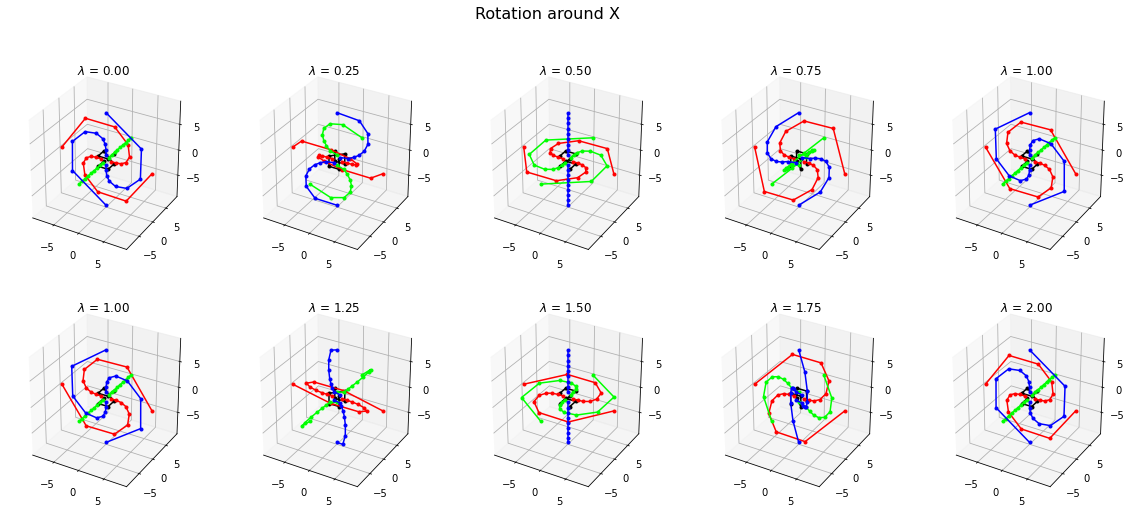

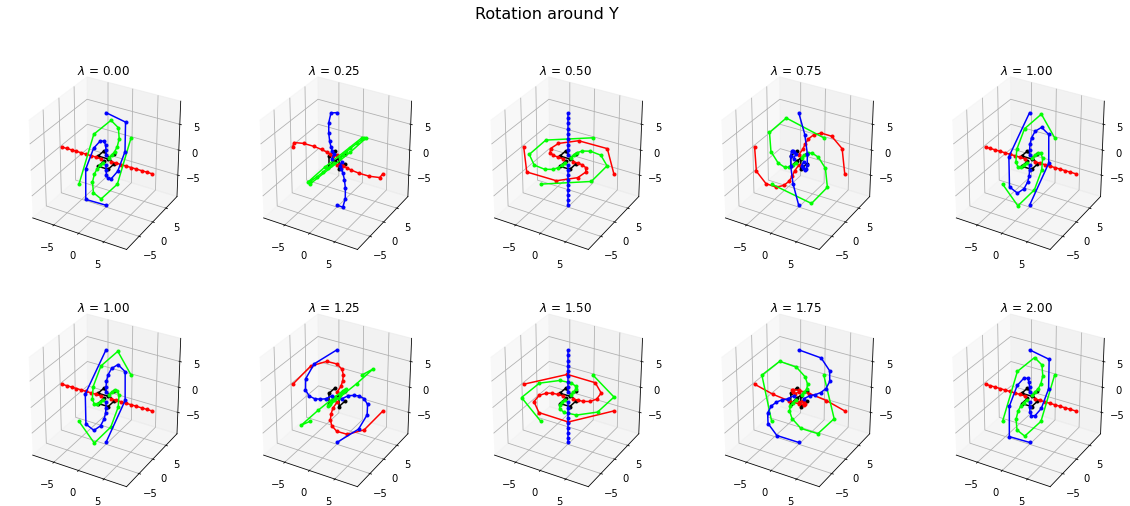

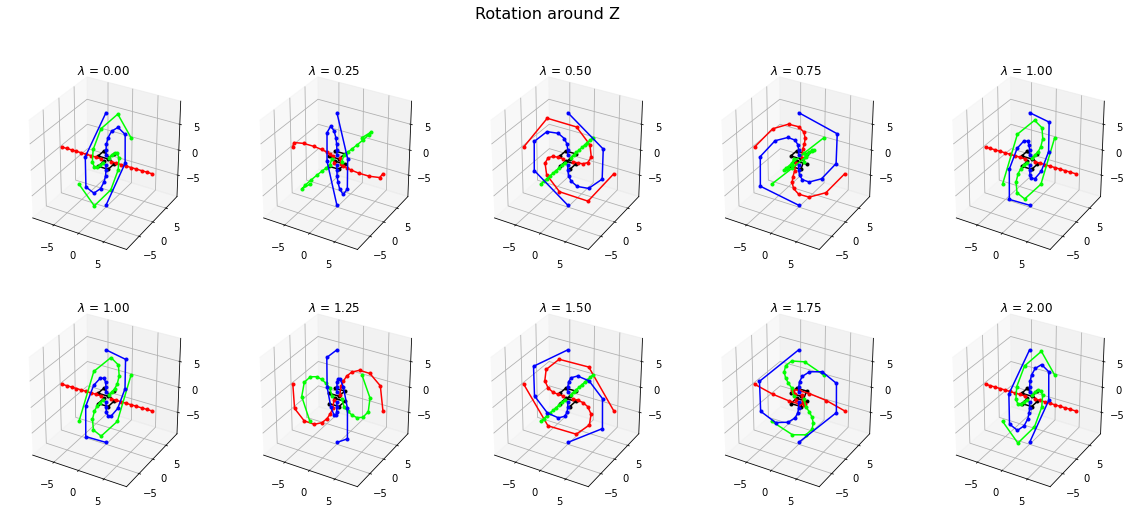

In [ ]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

save = False

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))
fig.suptitle("Rotation around X", fontsize=16)

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j
        
        rotation_axis = e1

        RotCube = R23(lam) * Cube * ~R23(lam)

        RotStringX1 = R23(0.5*lam)*S(1.5,e3, e1,String)*~R23(0.5*lam)
        RotStringX2 = R23(0.5*lam)*S(0.5,e3,-e1,R12(0.5)*String*~R12(0.5))*~R23(0.5*lam)

        RotStringY1 = S(lam+1,rotation_axis, e2,R12(0.25)*String*~R12(0.25))
        RotStringY2 = S(lam+0,rotation_axis,-e2,R12(0.75)*String*~R12(0.75))

        RotStringZ1 = S(lam+0.5,rotation_axis, e3,R23(0.25)*R12(0.75)*String*~R12(0.75)*~R23(0.25))
        RotStringZ2 = S(lam+1.5,rotation_axis,-e3,R23(0.75)*R12(0.75)*String*~R12(0.75)*~R23(0.75))


        
        draw3d(i,j,
               RotCube,
               RotStringX1,RotStringX2,
               RotStringY1,RotStringY2,
            RotStringZ1,RotStringZ2)
        '''
        Face = Poly3DCollection([[4,4,4],[4,-4,4],[4,-4,-4]])
        Face.set_color("lime")
        axs[j,i].add_collection3d(Face, zs=[4,4,-4,])
        '''

if save:
    plt.savefig(r"rot_x.pdf",format="pdf")
    files.download(r"rot_x.pdf")   
plt.show()

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))
fig.suptitle("Rotation around Y", fontsize=16)

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j

        rotation_axis = e2

        RotCube = R31(lam) * Cube * ~R31(lam)

        RotStringX1 = S(lam+0,rotation_axis, e1,String)
        RotStringX2 = S(lam+1,rotation_axis,-e1,R12(0.5)*String*~R12(0.5))

        RotStringY1 = R31(0.5*lam)*S(1.5,e3, e2,R12(0.25)*String*~R12(0.25))*~R31(0.5*lam)
        RotStringY2 = R31(0.5*lam)*S(0.5,e3,-e2,R12(0.75)*String*~R12(0.75))*~R31(0.5*lam)

        RotStringZ1 = S(lam+0.5,rotation_axis, e3,R23(0.25)*R12(0.75)*String*~R12(0.75)*~R23(0.25))
        RotStringZ2 = S(lam+1.5,rotation_axis,-e3,R23(0.75)*R12(0.75)*String*~R12(0.75)*~R23(0.75))
        
        

        draw3d(i,j,
               RotCube,
               RotStringX1,RotStringX2,
               RotStringY1,RotStringY2,
            RotStringZ1,RotStringZ2)

if save:             
    plt.savefig(r"rot_y.pdf",format="pdf")
    files.download(r"rot_y.pdf")         
plt.show()

plt.rcParams['figure.figsize'] = [4*N, 4*2]
fig, axs = plt.subplots(2,N,subplot_kw=dict(projection='3d'))
fig.suptitle("Rotation around Z", fontsize=16)

for j in range(2):
    for i in range(N): #index along the rotation angle
        lam = i / (N-1) + j
        
        rotation_axis = e3

        RotCube = R12(lam) * Cube * ~R12(lam)

        RotStringX1 = S(lam+1,rotation_axis, e1,String)
        RotStringX2 = S(lam+0,rotation_axis,-e1,R12(0.5)*String*~R12(0.5))

        RotStringY1 = S(lam+0.5,rotation_axis, e2,R12(0.25)*String*~R12(0.25))
        RotStringY2 = S(lam+1.5,rotation_axis,-e2,R12(0.75)*String*~R12(0.75))

        RotStringZ1 = R12(0.5*lam)*S(1.5,e2, e3,R23(0.75)*R12(0.75)*String*~R12(0.75)*~R23(0.75))*~R12(0.5*lam)
        RotStringZ2 = R12(0.5*lam)*S(0.5,e2,-e3,R23(0.25)*R12(0.75)*String*~R12(0.75)*~R23(0.25))*~R12(0.5*lam)
        
        draw3d(i,j,
               RotCube,
               RotStringX1,RotStringX2,
               RotStringY1,RotStringY2,
            RotStringZ1,RotStringZ2)

if save:
    plt.savefig(r"rot_z.pdf",format="pdf")
    files.download(r"rot_z.pdf") 
plt.show()
